<a href="https://colab.research.google.com/github/maithstartup/Practical-Machine-Learning-Bootcamp/blob/master/DT_Assignment(solved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***

#  Introduction to Decision Trees



Decision Trees are an important type of algorithm for predictive modeling machine learning.

The classical decision tree algorithms have been around for decades and modern variations like random forest are among the most powerful techniques available.

Classification and Regression Trees or `CART` for short is a term introduced by `Leo Breiman` to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “`decision trees`”, but on some platforms like R they are referred to by the more modern term CART.

The `CART` algorithm provides a foundation for important algorithms like `bagged decision trees`, `random forest` and `boosted decision trees`.

### CART Model Representation
The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a new input, the tree is traversed by evaluating the specific input started at the root node of the tree.



# Decision Tree Implementation in python

We will use Decision Tree in Predicting the attrition of your valuable employees.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Problem Statement

The key to success in any organization is attracting and retaining top talent. Our task is to classify which employess are likely to leave the compay and determine which factors keep employees at my company and which prompt others to leave. 

In [0]:
df = pd.read_csv("HR-Employee-Attrition.csv")         #change the directory to the location of the file 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 1. Exploratory Data Analysis

The below table shows us that the dataset consists  of 1470 rows and 35 columns. It also gives us information whether the features are categorical or numerical and indicates there or no missing values in the dataset.

In [0]:
print(df.shape)
df.info()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [0]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe() #gives the descriptive statistics of the data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [0]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [0]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [0]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

## 2. Data Visualisation

In [0]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

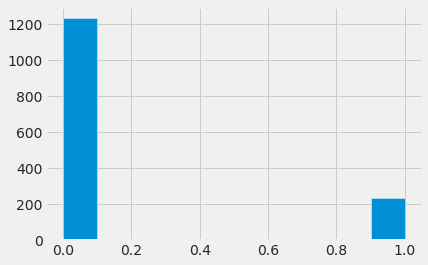

In [0]:
df["Attrition"].hist()

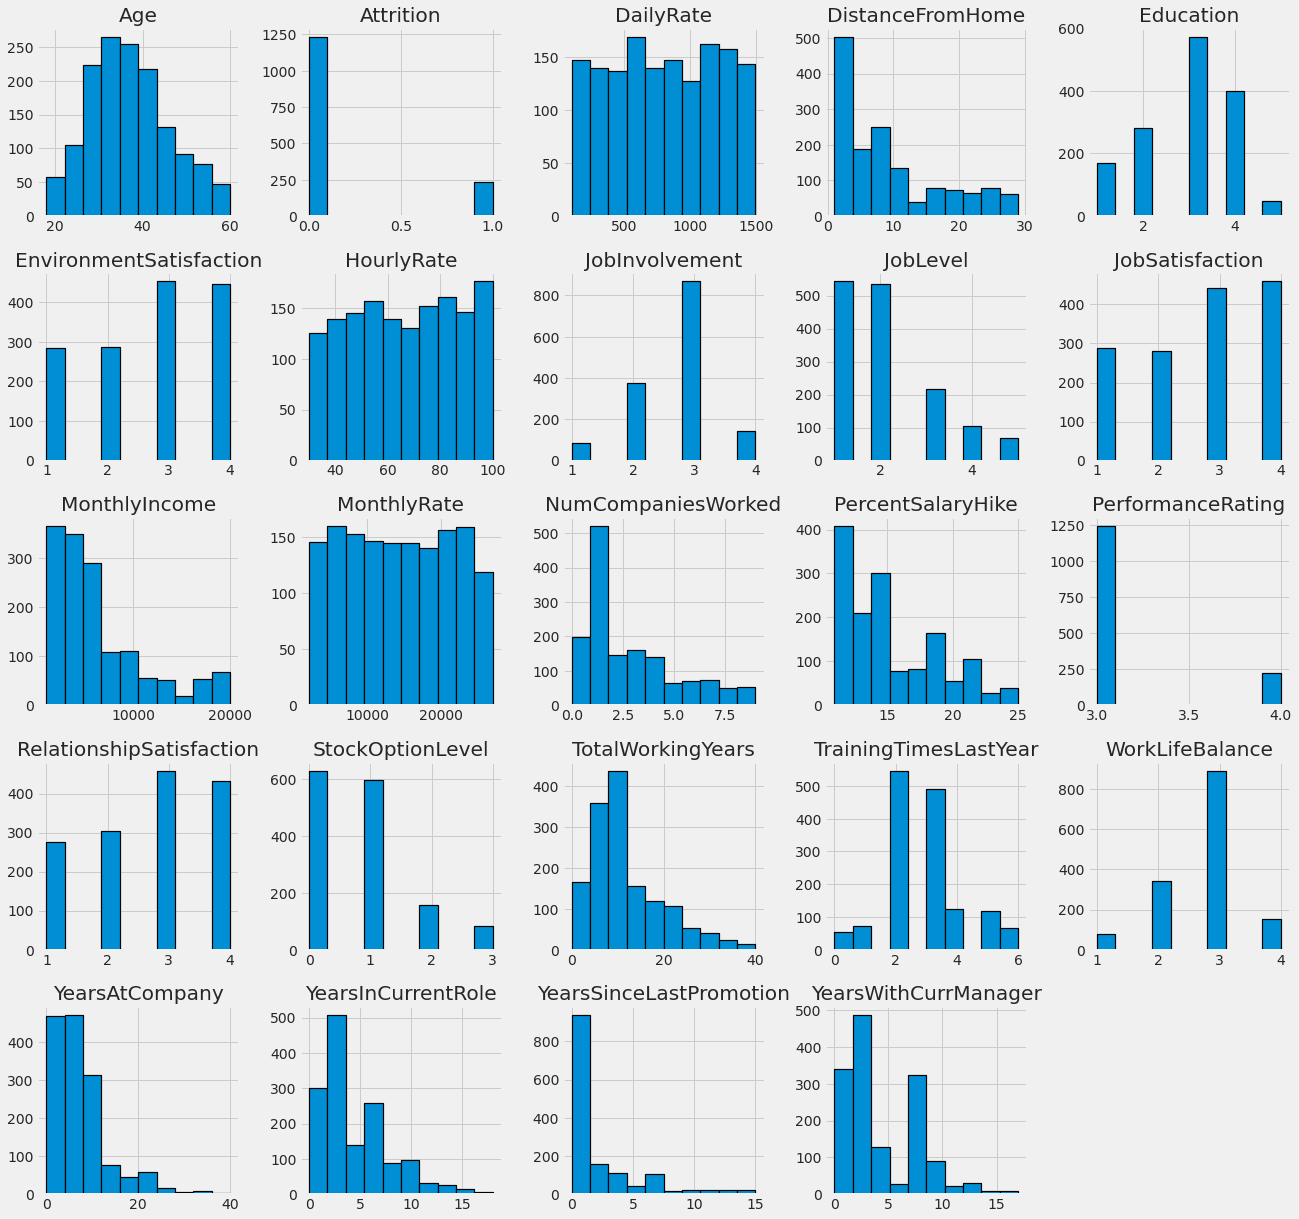

In [0]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

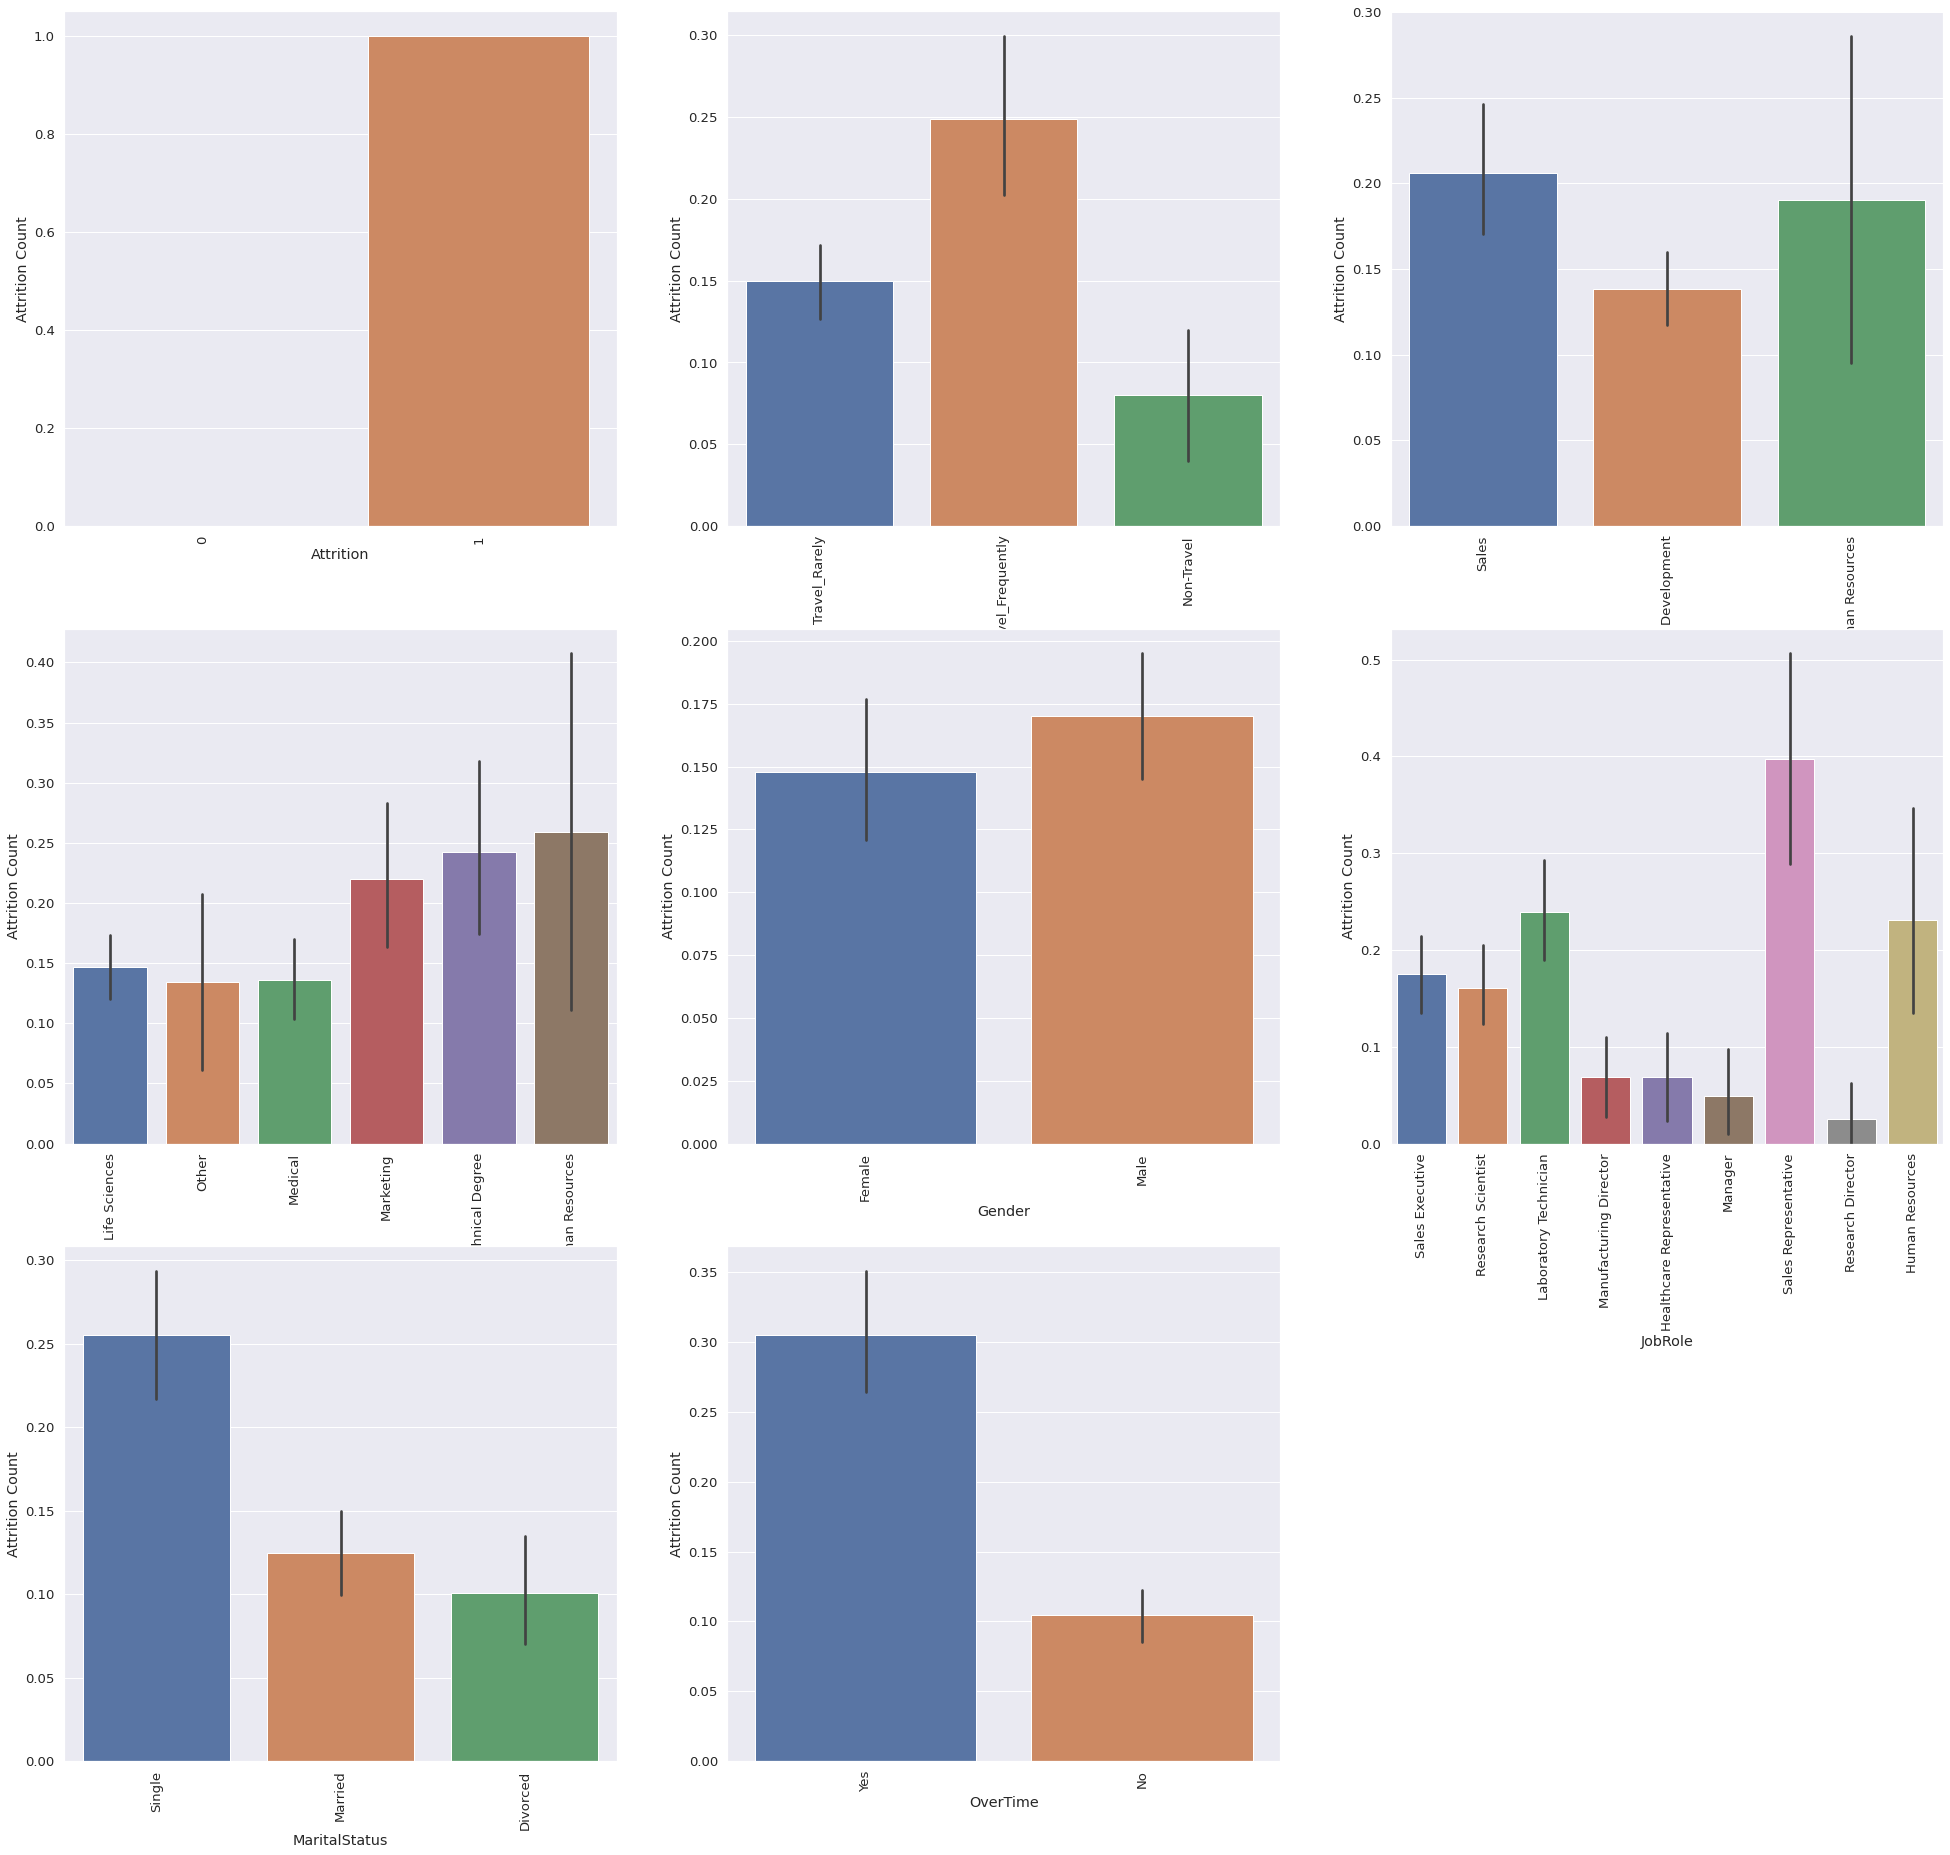

In [0]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

## 3. Data Processing

In [0]:
categorical_col.remove('Attrition')

In [0]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

The label encoder converts all categorical variables into numerical variables as each class corresponding to a number for training the model

In [0]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

## 4. Applying machine learning algorithms

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5 Decision Tree Classifier Parameters

- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
accuracy score: 0.7777777777777778

Classification Report: 
 	Precision: 0.2597402597402597
	Recall Score: 0.32786885245901637
	F1 score: 0.28985507246376807

Confusion Matrix: 
 [[323  57]
 [ 41  20]]



Confusion matrix and F1 score is used as a evaluation metric as the dataset is imbalanced. From the above results, it can be inferred that when we train using the default parameters of the DecisionTreeClassifier without restricting parameters like max_depth and min_samples_leaf the model overfits. This overfitting can be understood from the train accuracy and F1 score being 1 which shows that no point has been misclassified in training data. The very low F1 score of 0.28 indicates that the model performs very badly on test data. Our aim is to achieve a trade-off between train and test accuracy.

### Visualization of a tree

In [0]:
import graphviz
from sklearn.tree import export_graphviz
features = list(df.columns)
features.remove("Attrition")
classes=['Yes','No']
dot_data = export_graphviz(tree, out_file=None, 
                     feature_names=features,
                     class_names=classes,      
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.view()

'Source.gv.pdf'

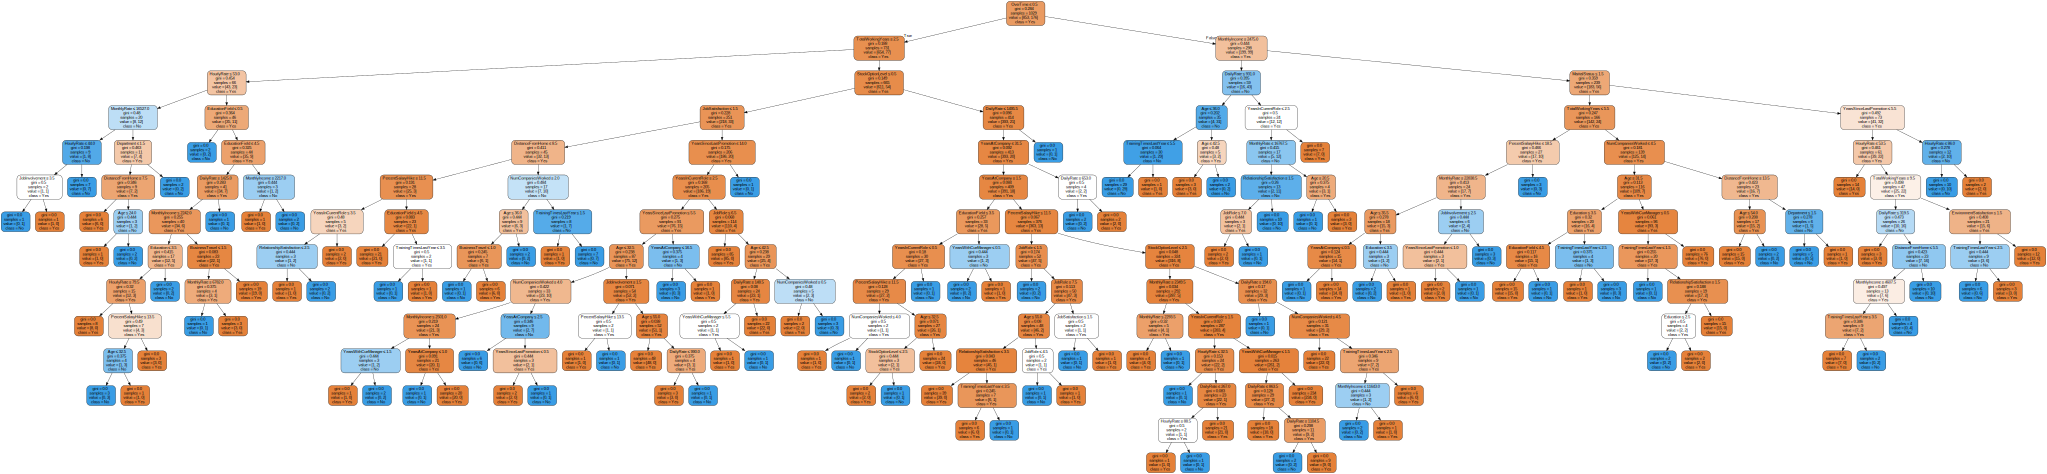

In [0]:
graph

The decision tree can be visualized using the graphviz library. At each node (decision) of the tree, we get the variable of splitting with the value, gini index of the samples of the dataset at that node, no of samples in each class and the majority class. A decision on which class (Attrition: Yes or No) a data point belongs to can be found by traversing through one branch of the tree.The above tree which has been trained with default parameters has a depth of 16. Higher the depth, more the chances of overfitting. The overfitting can be seen in the leaf nodes where the no of samples in each class is a very small number like one or two. This implies the dataset has an high risk of overfitting to the noisy points in the data.   

## 5.1 Decision Tree Classifier Hyper-Parameters

## Criterion

In [0]:
import time
t0 = time.time()
tree = DecisionTreeClassifier(random_state=42,max_depth = 3)
tree.fit(X_train, y_train)
print("Training time using gini criterion", round(time.time()-t0, 5), "s")
print('Accuracy using the defualt gini impurity criterion\n')
print_score(tree, X_train, y_train, X_test, y_test, train=False)

t0 = time.time()
tree = DecisionTreeClassifier(random_state=42,max_depth = 3, criterion = "entropy")
tree.fit(X_train, y_train)
print("Training time using entropy criterion", round(time.time()-t0, 5), "s")
print('Accuracy using the entropy criterion\n')
print_score(tree, X_train, y_train, X_test, y_test, train=False)



Training time using gini criterion 0.02789 s
Accuracy using the defualt gini impurity criterion

Test Result:
accuracy score: 0.8684807256235828

Classification Report: 
 	Precision: 0.6153846153846154
	Recall Score: 0.13114754098360656
	F1 score: 0.21621621621621623

Confusion Matrix: 
 [[375   5]
 [ 53   8]]

Training time using entropy criterion 0.00868 s
Accuracy using the entropy criterion

Test Result:
accuracy score: 0.8639455782312925

Classification Report: 
 	Precision: 0.5454545454545454
	Recall Score: 0.09836065573770492
	F1 score: 0.16666666666666666

Confusion Matrix: 
 [[375   5]
 [ 55   6]]



There is not much difference in the accuracies of entropy and gini at depth = 3. But training time is comparitively less for gini impurity than entropy gain. This shows that for large datasets the choice should be gini impurity as it is computationally less expensive due the absence of logarathimic functions unlike entropy.

## Splitter

In [0]:
t = time.time()
clf = DecisionTreeClassifier(random_state= 42,max_depth = 3, criterion = "entropy", splitter = 'best')
clf.fit(X_train,y_train)
print('Best Split running time...',time.time() - t)
print('Best Split accuracy...',clf.score(X_test,y_test))

t = time.time()
clf = DecisionTreeClassifier(random_state= 42,max_depth = 3, criterion = "entropy", splitter = 'random')
clf.fit(X_train,y_train)
print('Random Split running time...',time.time() - t)
print('Random Split accuracy...',clf.score(X_test,y_test))


Best Split running time... 0.026070594787597656
Best Split accuracy... 0.8639455782312925
Random Split running time... 0.0034742355346679688
Random Split accuracy... 0.8503401360544217


Even though there is a drop in the accuracy while using random split, random split decreases the training time significantly compared to best split as it takes a random subset of features for computing the Information gain. 

## Max Depth
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

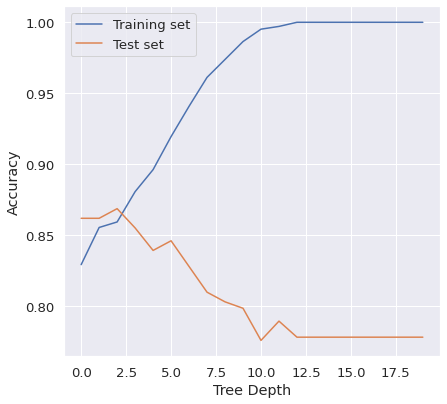

In [0]:
test_score = []
train_score = []
for depth in range(20):
    clf = DecisionTreeClassifier(random_state= 42,max_depth = depth + 1)
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))

plt.figure(figsize = (6,6))
plt.plot(range(20),train_score)
plt.plot(range(20), test_score)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

At a depth of around 5, a good tradeoff between test and train accuracy is obtained. At a depth of 1 or 2, the tree is shallow and underfits

Train Accuracy:   0.859086491739553
Test Accuracy:   0.8684807256235828


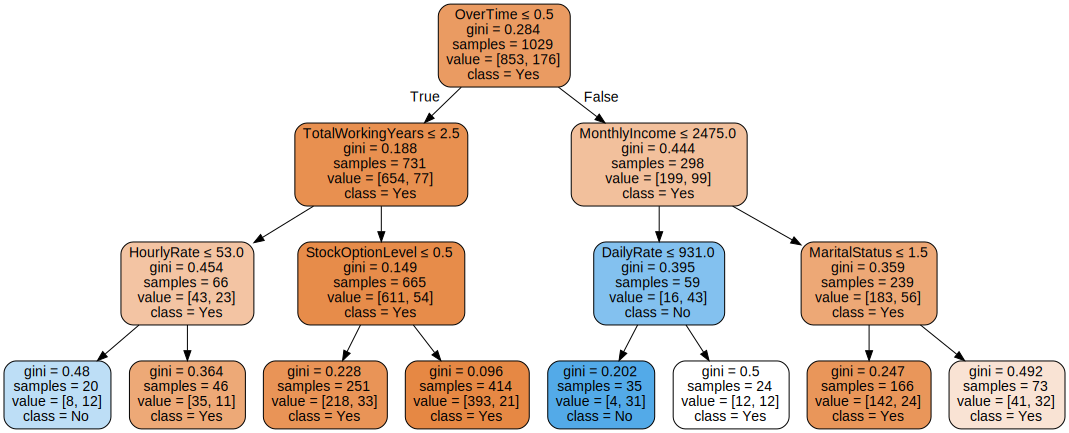

In [0]:
features = list(df.columns)
features.remove("Attrition")
classes=['Yes','No']
clf = DecisionTreeClassifier(random_state= 42,max_depth = 3,criterion = "gini", splitter = 'best')
clf.fit(X_train,y_train)
print('Train Accuracy:  ',clf.score(X_train,y_train))
print('Test Accuracy:  ',clf.score(X_test,y_test))
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=features,
                     class_names=classes,      
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.view()      #Uncomment text to view it as pdf
graph

The tree is pruned and stops growing after it reaches a depth of 5 as in the above graph

## Max_Features

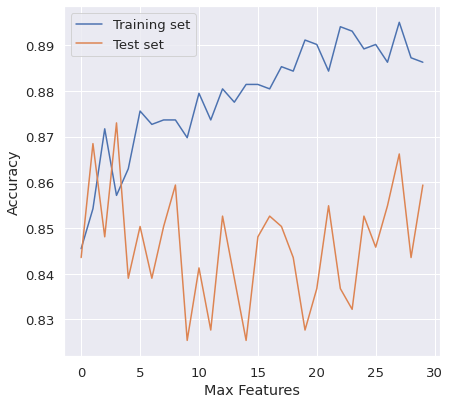

In [0]:
test_score = []
train_score = []
max_features = range(len(df.columns)-1)
for feat in max_features:
    clf = DecisionTreeClassifier(random_state= 42,max_features = feat + 1,max_depth=5,criterion = "entropy", splitter = 'best')
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))

plt.figure(figsize = (6,6))
plt.plot(max_features,train_score)
plt.plot(max_features, test_score)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

The max_features set to 3 gives a good accuracy on both the train and test set. This shows that comparing Information gain for just 3 features during a split can fit a really good model and also save a lot of computing time. But conclusive evidence on how many features is to be used for splitting can't be obtained from the graph as it is noisy.

# Min sample leaf
The minimum number of samples required to be at a leaf node: If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

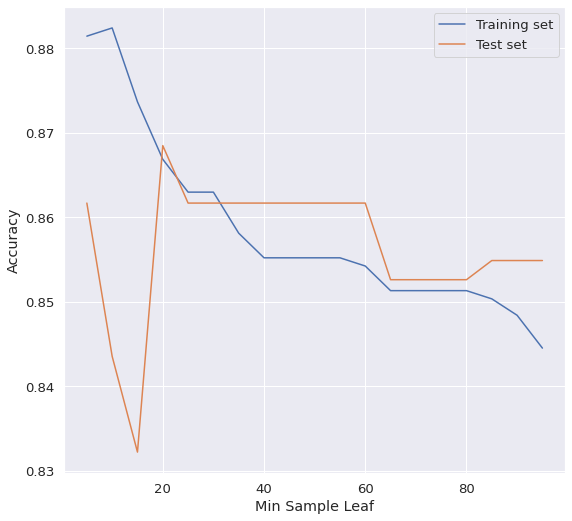

In [0]:
test_score = []
train_score = []
min_sample_leaf = np.arange(5,100,5)
for leaf in min_sample_leaf:
    clf = DecisionTreeClassifier(min_samples_leaf = leaf,max_depth=5,criterion = "entropy", splitter = 'best')
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))

plt.figure(figsize = (8,8))
plt.plot(min_sample_leaf,train_score)
plt.plot(min_sample_leaf, test_score)
plt.xlabel('Min Sample Leaf')
plt.ylabel('Accuracy')
plt.legend(['Training set','Test set'])

The value of min_sample leaf at 20 to 30 gives a reasonable test and train accuracy avoiding overfitting. When the minimum samples at leaf node is less than 20, the test accuracy is very low showing that the model isn't a generalized model. 

Train Accuracy:   0.8668610301263362
Test Accuracy:   0.8684807256235828


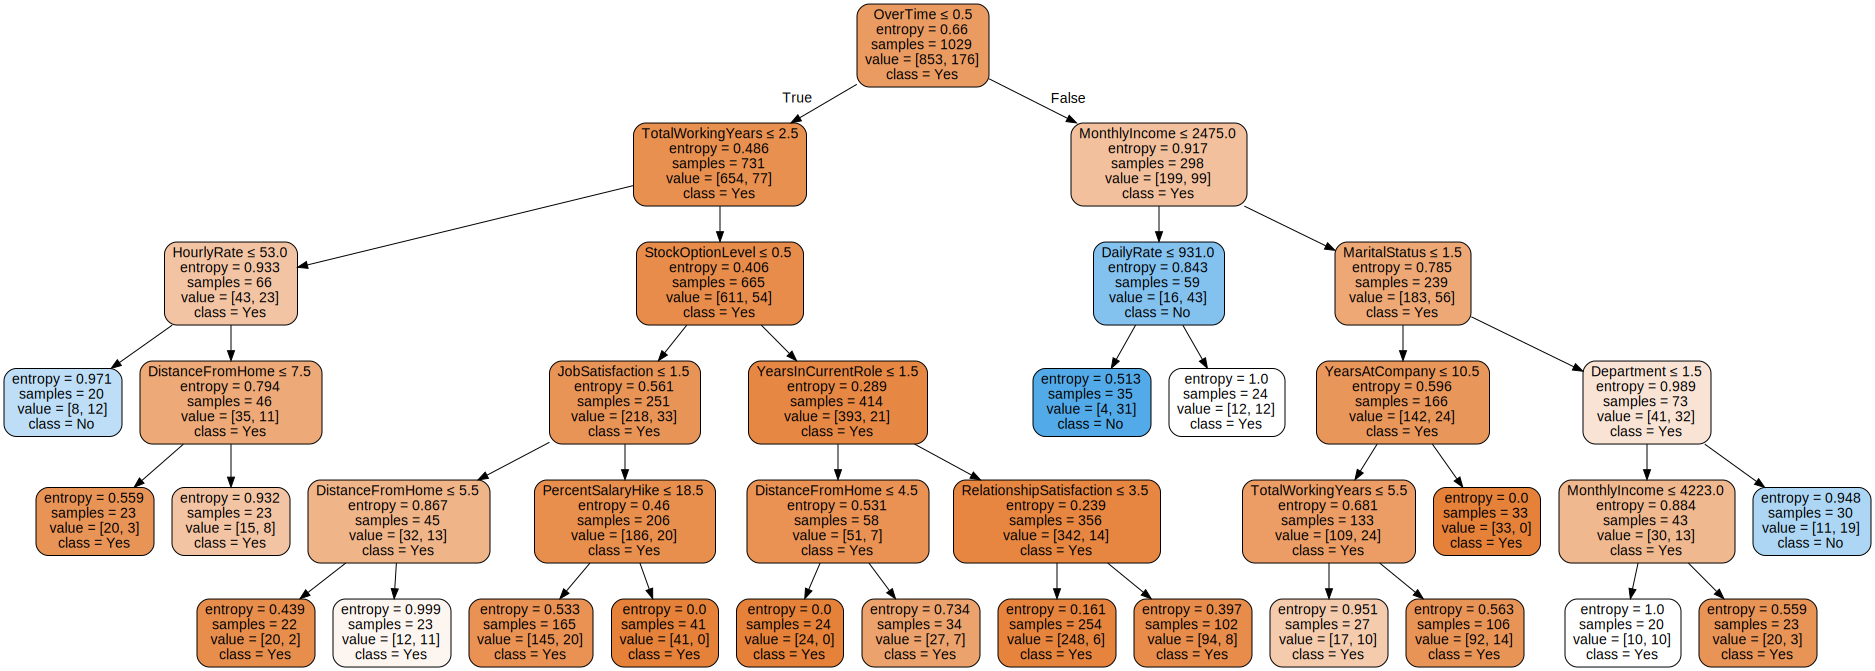

In [0]:
features = list(df.columns)
features.remove("Attrition")
classes=['Yes','No']

clf = DecisionTreeClassifier(random_state= 42,min_samples_leaf =20,max_depth = 5,criterion = "entropy", splitter = 'best')
clf.fit(X_train,y_train)
print('Train Accuracy:  ',clf.score(X_train,y_train))
print('Test Accuracy:  ',clf.score(X_test,y_test))
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=features,
                     class_names=classes,      
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.view()    #Uncomment text to view it as pdf
graph

Decision tree with the above specified parameters gives a very good train and test accuracy of 0.86 which suggests that the model has not overfit and also works pretty well on the test data. It can also be seen that number samples in the parent of each of the leaf nodes is greater than 20 as min_samples_leaf is set to 20. Therefore the splitting only occurs when the number of samples is greater than or equal to 20.

## Training Decision tree with optimal parameters

Let us check the accuracy and F1 scores of the above model with best fit parameters

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42,criterion = "entropy",max_depth = 5,min_samples_leaf =20, splitter = 'best')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8669

Classification Report: 
 	Precision: 0.7294117647058823
	Recall Score: 0.3522727272727273
	F1 score: 0.4750957854406131

Confusion Matrix: 
 [[830  23]
 [114  62]]

Test Result:
accuracy score: 0.8684807256235828

Classification Report: 
 	Precision: 0.5652173913043478
	Recall Score: 0.21311475409836064
	F1 score: 0.30952380952380953

Confusion Matrix: 
 [[370  10]
 [ 48  13]]



As the dataset is imbalanced, F1 score should also be considered while evaluating the model. Even though the train and test accuracies are high, F1 score values are less than 0.5.

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42,class_weight = 'balanced',criterion = "entropy",max_depth = 5,min_samples_leaf =20, splitter = 'best')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8416

Classification Report: 
 	Precision: 0.5286343612334802
	Recall Score: 0.6818181818181818
	F1 score: 0.5955334987593052

Confusion Matrix: 
 [[746 107]
 [ 56 120]]

Test Result:
accuracy score: 0.7936507936507936

Classification Report: 
 	Precision: 0.3170731707317073
	Recall Score: 0.4262295081967213
	F1 score: 0.3636363636363636

Confusion Matrix: 
 [[324  56]
 [ 35  26]]



F1 score can be increased by using the parameter class_weight = 'balanced' which penalizes mistakes in samples of class[i] with class_weight[i] instead of 1.

## 5.2. Decision Tree Classifier Hyperparameter tuning using GridSearchCV
GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters. The below model fits for all combinations of the 5 parameters given below with a 3-fold cross validation and the best estimators are obtained using Grid search.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
    "class_weight":(None,"balanced")
    #"max_features":(list(range(1,len(df.columns)))),
}


model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8664 candidates, totalling 25992 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 13322 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 24522 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 25989 out of 25992 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 25992 out of 25992 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='depr...
             param_grid={'class_weight': (None, 'balanced'),
                         'criterion':

In [0]:
 grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

The parameters for the best fit model suggested by Grid search is criterion = 'entropy', max_depth = 6, min_samples_leaf = 10.

In [0]:
tree = DecisionTreeClassifier( class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=42, splitter='best')

In [0]:
tree.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=42, splitter='best')

In [0]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8882

Classification Report: 
 	Precision: 0.7520661157024794
	Recall Score: 0.5170454545454546
	F1 score: 0.6127946127946129

Confusion Matrix: 
 [[823  30]
 [ 85  91]]

Test Result:
accuracy score: 0.854875283446712

Classification Report: 
 	Precision: 0.46153846153846156
	Recall Score: 0.29508196721311475
	F1 score: 0.36000000000000004

Confusion Matrix: 
 [[359  21]
 [ 43  18]]



The model obtained from the Grid search cross validation has a better F1 score than our model with optimal parameters.

### Visualization of a tree

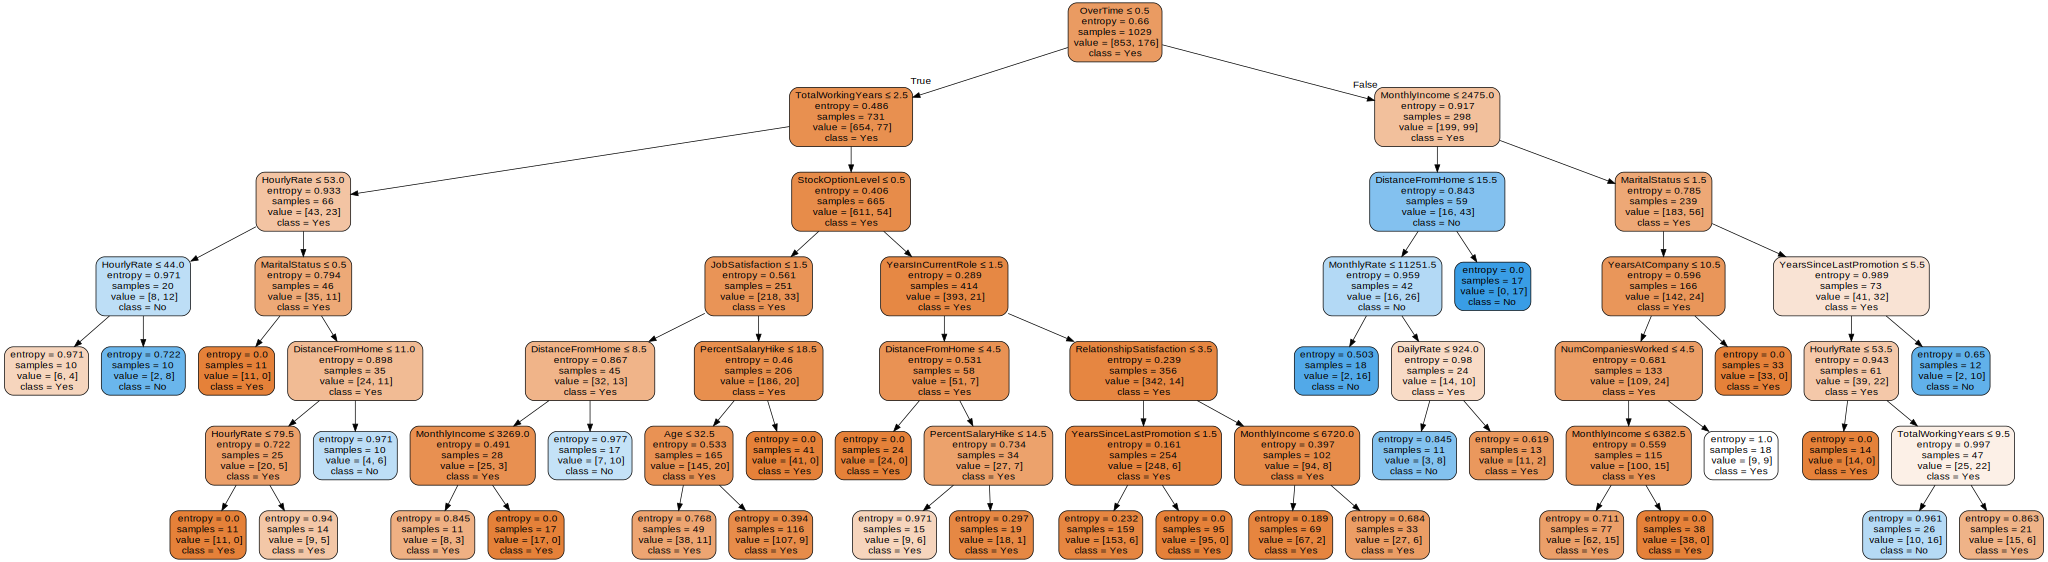

In [0]:
features = list(df.columns)
classes=['Yes','No']
features.remove("Attrition")
dot_data = export_graphviz(tree, out_file=None, 
                     feature_names=features,   
                     class_names=classes,      
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.view()         #Uncomment text to view it as pdf
graph


## 6. Feature Selection for Decision trees

Text(0.5, 0, 'Feature Importance')

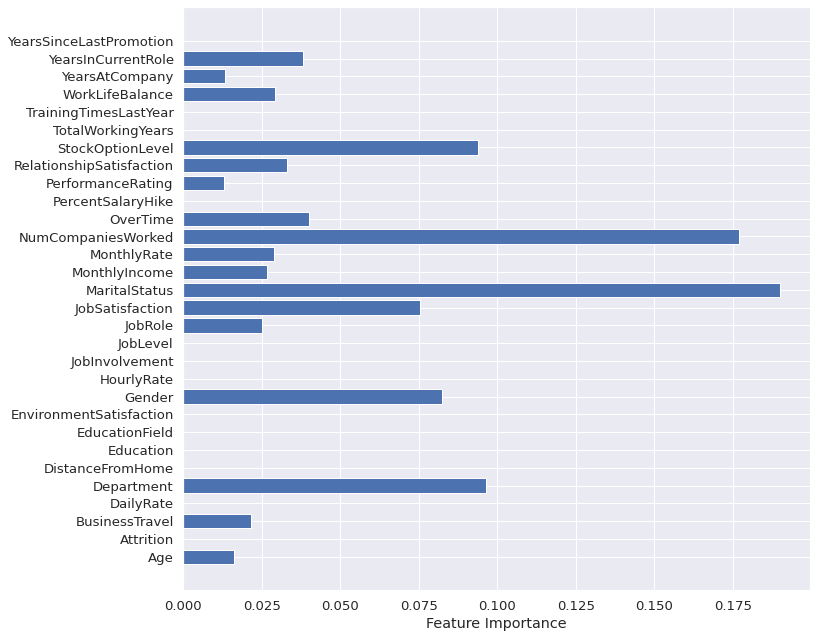

In [0]:
#print(len(tree.feature_importances_))
#print(len(df.columns))
plt.figure(figsize=(10,10))
plt.barh(range(len(df.columns)-1),tree.feature_importances_,align='center')
plt.yticks(range(len(df.columns)-1),df.columns)
plt.xlabel('Feature Importance')

Martial Status and No of Companies Worked influences employee attrition the most. Feature importance can be obtained from the reduction of entropy using each feature.

# 7. Summary
In this notebook we learned the following lessons:
- Decsion tree algorithms and the parameters of the algorithm.
- How to tune hyperparameters for  Decision trees.
- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. 

  